In [120]:
#%% Averaging method.
# See Example 9.

#from sympy import collect, expand, Function, Symbol
import sympy as sp
import scipy as sc
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np


## Define the problem

In [111]:


F = sp.Function('F')
a= sp.Function('a')
theta= sp.Function('theta')
t = sp.Symbol('t')
x = sp.Symbol('x')
y = sp.Symbol('y')
phi=sp.Symbol('phi')
eps = sp.Symbol('eps')
w0 = sp.Symbol('w0')


F =   x **3
F


x**3

In [112]:
da=-eps*sp.integrate(sp.sin(phi)*F.subs(x,a(t)*sp.cos(phi)),(phi,0,2*sp.pi))/(2*sp.pi*w0)
da

0

In [113]:
dtheta=-eps*sp.integrate(sp.cos(phi)*F.subs(x,a(t)*sp.cos(phi)),(phi,0,2*sp.pi))/(2*a(t)*sp.pi*w0)
dtheta

-3*eps*a(t)**2/(8*w0)

In [114]:
sol_a=sp.solvers.ode.dsolve(a(t).diff(t)-da)
sol_a

Eq(a(t), C1)

In [115]:
sol_t=sp.solvers.dsolve(theta(t).diff(t)-dtheta.subs(sol_a.lhs,sol_a.rhs))
sol_t

Eq(theta(t), -3*C1**2*eps*t/(8*w0) + C2)

In [116]:
sol=a(t)*sp.cos(w0*t+theta(t))
sol=sol.subs(a(t),sol_a.rhs).subs(theta(t),sol_t.rhs)
sol

C1*cos(-3*C1**2*eps*t/(8*w0) + C2 + t*w0)

In [117]:
consts=sp.solvers.solve([sol.subs(t,0)-1,sol.diff(t).subs(t,0)],'C1','C2')[0]
consts

{C1: -1, C2: pi}

In [118]:
sol_exp=sol.subs(consts).subs(w0,1)
sol_exp

cos(3*eps*t/8 - t)

# Numerical solution

In [131]:
eps_use=0.05
t_max=500
time=np.linspace(0,t_max,num=100)
def rhs(t,u,eps):
    x,y= u
    x_dot = y
    y_dot = -x +eps* x**3
    return [x_dot, y_dot]

seps=0.01
sol = solve_ivp(rhs, [0,t_max],[0,1],t_eval=time,args=([seps]))
sol_exp=sp.lambdify(t,sol_exp.subs('eps',seps))

AttributeError: 'function' object has no attribute 'subs'

(450.0, 500.0)

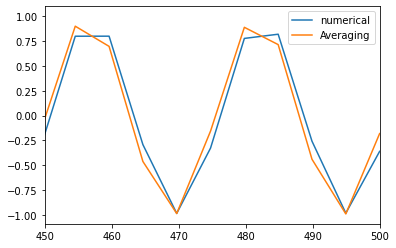

In [134]:
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,sol_exp(sol.t))
plt.legend(['numerical','Averaging'])
plt.xlim(450,500)

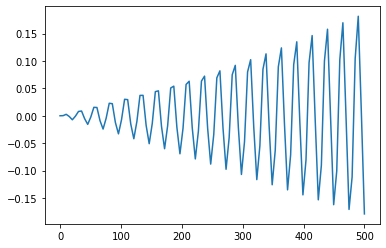

In [133]:
plt.plot(sol.t,sol.y[1]-sol_exp(sol.t))